In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

In [10]:
rng = np.random.default_rng(0)

data = {'yearWeek': ['2022-W1','2022-W2','2022-W3','2022-W4','2022-W5','2022-W6','2022-W7','2022-W8','2022-W9','2022-W10','2022-W11','2022-W12']*3,
        'country': ['US','US','US','US','US','US','US','US','US','US','US','US'] + ['India','India','India','India','India','India','India','India','India','India','India','India'] + ['Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia'],
        'conversionRate': [rng.random() for i in range(12*3)]
        }
df = pd.DataFrame(data)
df

,yearWeek,country,conversionRate
0,2022-W1,US,0.636962
1,2022-W2,US,0.269787
2,2022-W3,US,0.040974
3,2022-W4,US,0.016528
4,2022-W5,US,0.813270
5,2022-W6,US,0.912756
6,2022-W7,US,0.606636
7,2022-W8,US,0.729497
8,2022-W9,US,0.543625
9,2022-W10,US,0.935072


In [58]:
df_for_render = (df
    .assign(yearWeek=df.yearWeek.str.replace("2022-W","").astype('int8'))
)
print(df_for_render.dtypes)
df_for_render

yearWeek             int8
country            object
conversionRate    float64
dtype: object


,yearWeek,country,conversionRate
0,1,US,0.636962
1,2,US,0.269787
2,3,US,0.040974
3,4,US,0.016528
4,5,US,0.813270
5,6,US,0.912756
6,7,US,0.606636
7,8,US,0.729497
8,9,US,0.543625
9,10,US,0.935072


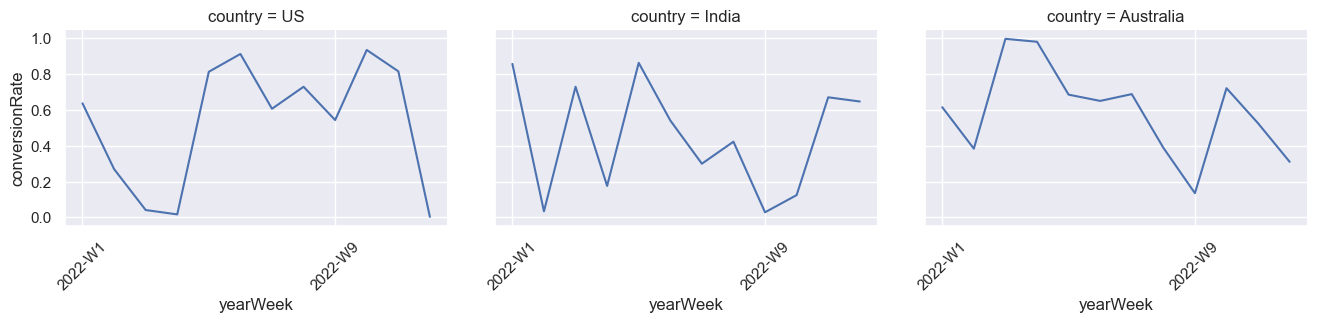

In [11]:
g = sns.FacetGrid(df, col="country", aspect=1.5)
g.map_dataframe(sns.lineplot, x='yearWeek', y='conversionRate')
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks()[::2])
    plt.setp(ax.get_xticklabels(), rotation=45)

In [30]:
pd.to_datetime("2022-W2")

ParserError: Unknown string format: 2022-W2 present at position 0

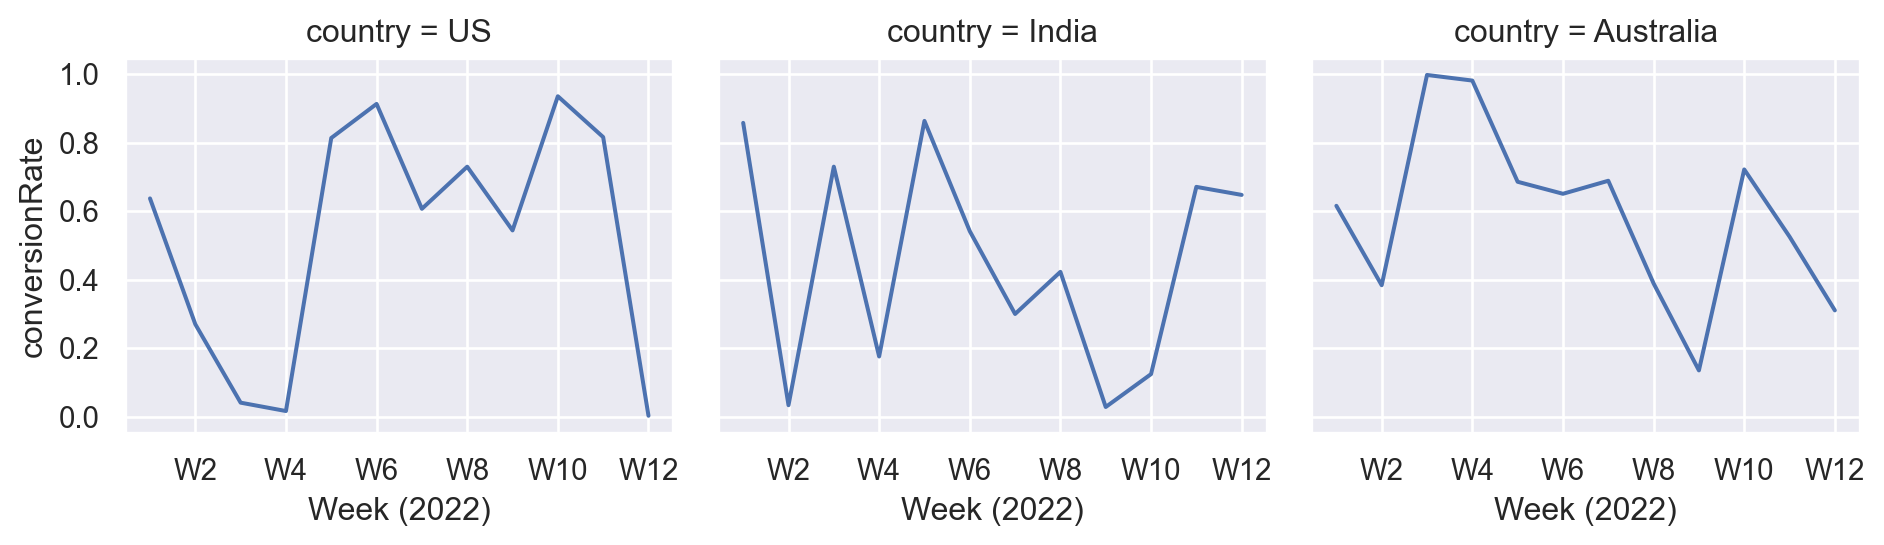

In [65]:
(
    so.Plot(df_for_render, x="yearWeek", y="conversionRate")
    .facet("country")
    .add(so.Line())
    .scale(x=so.Continuous().tick(every=2).label(like="W{x:.0f}"))
    .label(x="Week (2022)", col="country =")
    .layout(size=(10, 3))
)

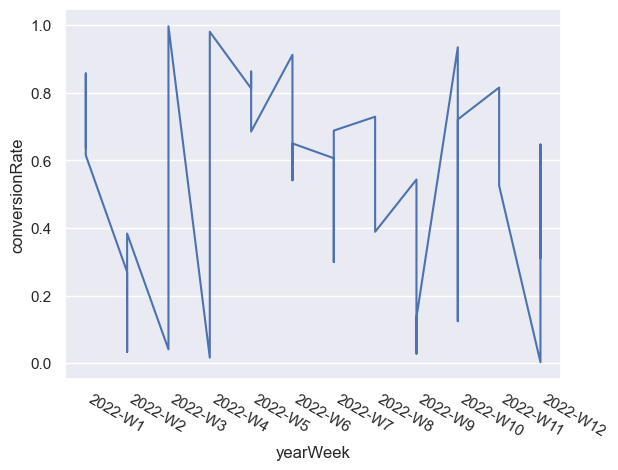

In [67]:
## Rotate tick label in Seaborn object interface is not yet supported
# https://github.com/mwaskom/seaborn/issues/2977
# https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot#26540821
ax = plt.gca()
(
    so.Plot(df, x="yearWeek", y="conversionRate")

    # This fails with error `Cannot create multiple subplots after calling `Plot.on` with a <class 'matplotlib.axes._axes.Axes'> object`
    # .facet("country")

    .add(so.Line())
    .layout(size=(8, 3))
    .on(ax)
    .plot()
)
plt.xticks(rotation=-30, ha='left')
plt.show()